# Описание проекта

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Общая информация

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
from matplotlib import pyplot as plt

Откроем предоставленные нам файлы с данными.

In [2]:
#рабочий код в локальной версии:
#df_cal = pd.read_csv('calls.csv')
#df_int = pd.read_csv('internet.csv')
#df_mes = pd.read_csv('messages.csv')
#df_tar = pd.read_csv('tariffs.csv')
#df_use = pd.read_csv('users.csv')

In [3]:
 #рабочий код с указанием папки хранения на ЯП:
df_cal = pd.read_csv('/datasets/calls.csv')
df_int = pd.read_csv('/datasets/internet.csv', index_col=0)
df_mes = pd.read_csv('/datasets/messages.csv')
df_tar = pd.read_csv('/datasets/tariffs.csv')
df_use = pd.read_csv('/datasets/users.csv')

Выведим основную информацию по каждому датафрейму.

In [4]:
df_cal.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [5]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [6]:
df_int.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [7]:
df_int.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


Мы видим, что в dataframe `df_int` появился столбец `Unnamed: 0`, который дублирует индекс, вполне вероятно, что он нам не пригодится. При обработке данных удалим удалим его.

In [8]:
df_mes.head(3)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000


In [9]:
df_mes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [10]:
df_tar.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [11]:
df_tar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [12]:
df_use.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [13]:
df_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Общий вывод

Из формирования общей инфорамации о данных, мы можем сделать следующие выводы.

В выборке 500 пользователей. Они отправили 123036 сообщений, совершили 202607 шт звонков и 149396 интернет-сессий.

Заголовки прописаны согласно рекомендациям PEP8. По названием столбцов, скорее всего нам нужно будет переименовать столбцы `id` в dataframe - `df_cal`, `df_int`, `df_mes`, т.к. они с одним наименованием, однако обозначают разные процессы, что может нарушить корректность рабочих процессов по анализу данных в дальнейшем.

Пропущенные значения есть в одном столбце `churn_date` - дата прекращения обслуживания, датафрейма `df_use`. При небходимости заполним в дальнейшем нужными данными.

По типам данных. Нам необходимо будет изменить тип данных в датах во всех dataframe, где они присутствуют. Также мы изменим все колонки `user_id` с `int` на `str`, так как эти данные относятся к категориальным данным.

## Предобработка данных

### Заголовки

При общем обзоре данных, мы решили, что необходимо изменить заголовки с названиями `id` на более соответствующие им. Проведем это для каждого необходимого dataframe.

In [14]:
df_cal = df_cal.rename(columns={'id': 'id_cal'})
df_int = df_int.rename(columns={'id': 'id_int'})
df_mes = df_mes.rename(columns={'id': 'id_mes'})

In [15]:
df_cal.head(1) #выборочно выведим один датафрейм и посмотрим заменилось ли имя столбца

,id_cal,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000


#### Вывод

Мы успешно провели изменения наименований столбцов

### Пропущенные значения

В ходе общего обзора датафреймов, мы обнаружили пропущенные значения в одном из столбцов датафрейма `df_use` в столбце `churn_date`- дата прекращения пользованием тарифом.

Нам известно, что пропущенные значения указывают на то, что тариф еще действовал на момент выгрузки данных. 

Оставим пока в столбце `churn_date` пропущенные значения.

#### Вывод

Мы решили оставить пропущенные значения в столбце `churn_date`

### Изменения типа данных

По типам данных. Нам необходимо будет изменить тип данных в датах во всех dataframe, где они присутствуют. 

Далее, мы изменим все колонки user_id с int на str, так как эти данные относятся к категориальным данным.

Чтобы не повторять один и тот же код, напишем функцию с помощью которой изменим тип данных столбцов с датой.

Сразу же в функцию добавим месяц совершения итераций и преобразуем в удобочитаемый вид.

In [16]:
def change_date(data, column):
    """Функция создает новый столбец с 'правильными' датами, создает столбец с месяцем итерации и преобразует его в удобочитаемый вид """
    
    data[column + '_main'] = pd.to_datetime(data[column], format='%Y-%m-%d')
    data['month_iter'] = pd.DatetimeIndex(data[column + '_main']).month
    month = {1: '01_Январь', 2: '02_Февраль', 3: '03_Март', 4: '04_Апрель', 5: '05_Май', 6: '06_Июнь', 7: '07_Июль', 8: '08_Август', 9: '09_Сентябрь', 10: '10_Октябрь', 11: '11_Ноябрь', 12: '12_Декабрь'}
    data['month_iter'] = data['month_iter'].map(month)

Применим сразу нашу функцию к необходимым датафреймам.

In [17]:
change_date(df_cal, 'call_date')
change_date(df_int, 'session_date')
change_date(df_mes, 'message_date')
change_date(df_use, 'reg_date')

Аналогично образом изменим типы данных столбцов `user_id` с int на str. Создадим функцию по замене значений.

In [18]:
def change_type(data):
    """Функция меняет тип данных с int на str"""
    
    data['user_id'] = data['user_id'].astype('str')

Применим функцию к необходимым данным.

In [19]:
change_type(df_cal)
change_type(df_int)
change_type(df_mes)
change_type(df_use)

Выборочно проверим изменения, выведим 5 строк общей информации у одного датафрейма.

In [20]:
df_mes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id_mes             123036 non-null  object        
 1   message_date       123036 non-null  object        
 2   user_id            123036 non-null  object        
 3   message_date_main  123036 non-null  datetime64[ns]
 4   month_iter         123036 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 4.7+ MB


#### Вывод

Мы успешно провели изменения типов данных столбцов `user_id` и столбцов с датами.

## Подготовка данных

#### Добавление столбцов

Добавим в датафреймы `df_cal`, `df_int`, `df_mes` столбецы с тарифами.

In [21]:
#воспользуемся методом merge()
df_cal = df_cal.merge(df_use[['user_id', 'tariff']])
df_int = df_int.merge(df_use[['user_id', 'tariff']])
df_mes = df_mes.merge(df_use[['user_id', 'tariff']])

Проверим результат на одном датафрейме, выведим одну строку.

In [22]:
df_cal.head(1)

,id_cal,call_date,duration,user_id,call_date_main,month_iter,tariff
0,1000_0,2018-07-25,0.0,1000,2018-07-25,07_Июль,ultra


#### Вывод

Мы успешно добавили необходимые столбцы.

### Звонки

#### Количество звонков

Посчитаем количество сделанных звонков по месяцам на каждого пользователя. Для этого создадим отдельный датафрейм `df_cal_month_user_count`. Значения в нем сразу переведем в формат `int`. Испльзуем для этого метод `pivot_table`.

In [23]:
df_cal_month_user_count = pd.pivot_table(df_cal, index = ['user_id', 'tariff'], columns = 'month_iter', values = 'id_cal', aggfunc = 'count', fill_value=0).astype(int)

Выведим полученный датафрейм `df_cal_month_user_count`

In [24]:
df_cal_month_user_count.head()

,month_iter,01_Январь,02_Февраль,03_Март,04_Апрель,05_Май,06_Июнь,07_Июль,08_Август,09_Сентябрь,10_Октябрь,11_Ноябрь,12_Декабрь
user_id,tariff,,,,,,,,,,,,
1000,ultra,0,0,0,0,22,43,47,52,58,57,43,46
1001,smart,0,0,0,0,0,0,0,0,0,0,59,63
1002,smart,0,0,0,0,0,15,26,42,36,33,32,33
1003,ultra,0,0,0,0,0,0,0,55,134,108,115,108
1004,ultra,0,0,0,0,9,31,22,19,26,29,19,21


#### Вывод

Мы успешно создали датафрейм, в котором посчитали количество совершенных звонков по каждому пользователю помесячно

#### Количество израсходованных минут

Посчитаем количество израсходованных минут разговора по месяцам на каждого пользователя.

Так как в операторе связи принято округлять каждый звонок с секунд до минут, для подсчета количества израсходованных минут нам нужно округлить значения.

Для этого создадим новый столбец `duration_min` в датафрейми `df_cal` в котором будут содержаться округленные до мин данные по каждому совершенному звонку. 

Округлим значения каждоного звонка до минут и сразу изменим тип данных на `int`

In [25]:
df_cal['duration_minute'] = np.ceil(df_cal['duration']).astype(int)

Далее, для подсчета израсходованных минут каждого пользователя, создадим сводную таблицу `df_cal_month_user_sum`, применим метод *pivot_table()*

In [26]:
df_cal_month_user_sum = pd.pivot_table(df_cal, index = ['user_id', 'tariff'], columns = 'month_iter', values = 'duration_minute', aggfunc = 'sum', fill_value=0).astype(int).reset_index()

Выведим полученный датафрейм `df_cal_month_user_sum`

In [27]:
df_cal_month_user_sum.head(3)

month_iter,user_id,tariff,01_Январь,02_Февраль,03_Март,04_Апрель,05_Май,06_Июнь,07_Июль,08_Август,09_Сентябрь,10_Октябрь,11_Ноябрь,12_Декабрь
0,1000,ultra,0,0,0,0,159,172,340,408,466,350,338,333
1,1001,smart,0,0,0,0,0,0,0,0,0,0,430,414
2,1002,smart,0,0,0,0,0,117,214,289,206,212,243,236


#### Вывод

Мы успешно посчитали израсходованные минуты по каждому пользователю помесячно и сохранили все это в датафрейм `df_cal_month_user_sum`

#### Израсходованные минуты превышающие бесплатный лимит

Вычислим расход минут превышающий бесплатный лимит в рамках тарифа и сохраним это в датафрейм `df_cal_month_user_sum_total`

Создадим датафрейм `df_cal_month_user_sum_total` в котором в итоге у нас будут указаны кол-во минут разговора сверх бесплатного лимита, по каждому клиенту и по каждому месяцу.

In [28]:
df_cal_month_user_sum_total = df_cal_month_user_sum.copy()

Создадим список колонок с названиями месяцев. Который будем в дальнейшем применять к данным по ежемесячным расходам

In [29]:
list_month = ['01_Январь', '02_Февраль', '03_Март', '04_Апрель', '05_Май', '06_Июнь', '07_Июль', '08_Август', '09_Сентябрь', '10_Октябрь', '11_Ноябрь', '12_Декабрь']

Вычтим из общего кол-ва потраченных минут бесплатные минуты по каждому тарифу отдельно.

Для оптимизации напишем фукнцию для расчета `count_iter`

In [30]:
def count_iter(data_new, tarif, column_tar):
    if tarif == 'ultra':
        data_new.loc[data_new['tariff'] == 'ultra', list_month] = data_new.loc[data_new['tariff'] == 'ultra', list_month] - df_tar.loc[1, column_tar]
    elif tarif == 'smart':
        data_new.loc[data_new['tariff'] == 'smart', list_month] = data_new.loc[data_new['tariff'] == 'smart', list_month] - df_tar.loc[0, column_tar]

Применим функцию к клиентам с тарифом `ultra`

In [31]:
count_iter(df_cal_month_user_sum_total, 'ultra', 'minutes_included')

Аналогично применим к клиентам с тарифом `smart`

In [32]:
count_iter(df_cal_month_user_sum_total, 'smart', 'minutes_included')

Заменим все отрицательные значения в датафрейме `df_cal_month_user_sum_total` на 0

In [33]:
df_cal_month_user_sum_total[list_month] = df_cal_month_user_sum_total[list_month].clip(lower=0)

Выведим выборочно полученные результаты `df_cal_month_user_sum_total`

In [34]:
df_cal_month_user_sum_total.tail()

month_iter,user_id,tariff,01_Январь,02_Февраль,03_Март,04_Апрель,05_Май,06_Июнь,07_Июль,08_Август,09_Сентябрь,10_Октябрь,11_Ноябрь,12_Декабрь
487,1495,ultra,0,0,0,0,0,0,0,0,0,0,0,0
488,1496,smart,0,94,57,21,0,55,82,27,0,0,162,18
489,1497,smart,0,0,0,0,0,0,0,0,0,0,0,45
490,1498,smart,0,0,0,0,0,0,0,0,0,0,0,0
491,1499,smart,0,0,0,0,0,0,0,0,0,0,112,0


#### Вывод

Мы успешно посчитали израсходованные минуты разговоров сверх бесплатного лимита по каждому тарифу, по каждому клиенту, по месяцам.

### Вывод

Мы успешно посчитали количество звонков совершаемых клиентами, общее количество минут разговоров и количество минут разговоров сверх бесплатного лимита, по каждому тарифу, по каждому пользователю и по каждому месяцу.

### Сообщения

#### Общее количество отправленных сообщений

Посчитаем количество отправленных сообщений по месяцам, создадим для этого датафрейм `df_mes_month_user` и воспользуемся методом *pivot_table()*:

In [35]:
df_mes_month_user = pd.pivot_table(df_mes, index = ['user_id', 'tariff'], columns = 'month_iter', values = 'id_mes', aggfunc = 'count', fill_value=0).astype(int).reset_index()

Выведим первые 5 строк полученного датафрейма

In [36]:
df_mes_month_user.head()

month_iter,user_id,tariff,01_Январь,02_Февраль,03_Март,04_Апрель,05_Май,06_Июнь,07_Июль,08_Август,09_Сентябрь,10_Октябрь,11_Ноябрь,12_Декабрь
0,1000,ultra,0,0,0,0,22,60,75,81,57,73,58,70
1,1002,smart,0,0,0,0,0,4,11,13,4,10,16,12
2,1003,ultra,0,0,0,0,0,0,0,37,91,83,94,75
3,1004,ultra,0,0,0,0,95,134,181,151,146,165,158,162
4,1005,smart,7,38,56,41,42,47,56,64,52,44,51,54


#### Вывод

Мы успешно посчитали общее количество отправленных сообщений по каждому клиенту и по каждому месяцу.

#### Израсходованные сообщения сверх бесплатного лимита

Создадим датафрей `df_mes_month_user_sum_total` в котором сохраним данные о количестве отправленных сообщений сверх бесплатного лимита.

In [37]:
df_mes_month_user_sum_total = df_mes_month_user.copy()

Для получения данных вычтем из общего количества отправленных сообщеий лимиты согласно тарифам, применим к каждому тарифу отдельно.

Применим к клиентам с тарифом ultra

In [38]:
count_iter(df_mes_month_user_sum_total, 'ultra', 'messages_included')

Аналогично применим к клиентам с тарифом smart

In [39]:
count_iter(df_mes_month_user_sum_total, 'smart', 'messages_included')

Заменим все отрицательные значения в датафрейме df_mes_month_user_sum_total на 0

In [40]:
df_mes_month_user_sum_total[list_month] = df_mes_month_user_sum_total[list_month].clip(lower=0)

#### Вывод

Мы успешно вычислили израсходованные сообщения сверх бесплатного лимита.

### Вывод

Мы успешно посчитали общее количество отправленных сообщений и вычислили отправленные сообщения сверх бесплатного лимита по каждому тарифу, по каждому клиенту и по каждому месяцу.

### Интернет

#### Общий объем израсходованного интернет-трафика

Подготовим сводную таблицу по расходованию интернета и, чтобы не плодить много кода, переведем сразу в Гб. и т.к. в операторе связи все использованный интернет округляется в большую сторону, сразу проведем округление. Сохраним данные в датафрейме `df_int_month_user`

In [41]:
df_int_month_user = np.ceil(pd.pivot_table(df_int, index = ['user_id', 'tariff'], columns = 'month_iter', values = 'mb_used', aggfunc = 'sum', fill_value=0)/1024).reset_index()

#### Вывод

Мы успешно посчитали общий объем исрасходованного интернет-трафика и округлили согласно тарифам до Гб. по каждому клиенту и по каждому месяцу.

#### Объем израсходованного интернет-трафика сверх бесплатного лимита

Создадим датафрейм `df_int_month_user_sum_total` в котором будем учитывать кол-во израсходованных единиц сверх бесплатного лимита.

In [42]:
df_int_month_user_sum_total = df_int_month_user.copy() #создадим копию датафрейми с общими расходами интернета

Вычтим из всех расходов интернета по каждому пользователю бесплатные лимиты согласно тарифам

Для оптимизации напишем фукнцию для расчета `count_iter_int`

In [43]:
def count_iter_int(data_new, tarif):
    if tarif == 'ultra':
        data_new.loc[data_new['tariff'] == 'ultra', list_month] = data_new.loc[data_new['tariff'] == 'ultra', list_month] - int(round(df_tar.loc[1, 'mb_per_month_included'] / 1024))
    elif tarif == 'smart':
        data_new.loc[data_new['tariff'] == 'smart', list_month] = data_new.loc[data_new['tariff'] == 'smart', list_month] - int(round(df_tar.loc[0, 'mb_per_month_included'] / 1024))

Применим к клиентам с тарифом ultra

In [44]:
count_iter_int(df_int_month_user_sum_total, 'ultra')

Аналогично применим к клиентам с тарифом smart

In [45]:
count_iter_int(df_int_month_user_sum_total, 'smart')

Переведем данные датафрейма `df_int_month_user_sum_total` в формат данных `int`

In [46]:
df_int_month_user_sum_total[list_month] = df_int_month_user_sum_total[list_month].clip(lower=0).astype(int)

#### Вывод

Мы успешно посчитали объем израсходованного интернет-трафика сверх бесплатного лимита

### Вывод

Мы успешно посчитали объем израсходованного интернет-трафика и вычислили объем израсходованного интернет-трафика сверх бесплатного лимита по каждому тарифу, по каждому клиенту и по каждому месяцу.

### Выручка по каждому пользователю

Для того, чтобы посчитать общую выручку по каждому пользователю нужно взять ежемесячную абонентскую плату по тарифу и прибавить к ней доходы от сверхлимитных доходов по тарифам.

#### Доходы сверх ежемесячного тарифа

Для того, чтобы посчитать доходы по сверхлимитным тратам, нам нужно испльзовать данные о сверхлимитных расходований клиентов по каждой услуге.

У нас есть три датафрейм с расходами сверх лимита:

`df_col_month_user_sum_total` - по звонкам

`df_mes_month_user_sum_total` - по сообщениям

`df_int_month_user_sum_total` - по интернету

Посчитаем выручку по этим данным и далее добавим к стоимости тарифного плана.

Выведим датафрейм в котором указаны стоимости по каждой услуге и по его мы будет использовать для подсчета сверхлимитов.

In [47]:
df_tar.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Создадим датафреймы для учета расходов сверх бесплатных норм тарифного плата в руб.:

df_col_month_user_sum_total_rub - по звонкам

df_mes_month_user_sum_total_rub - по сообщениям

df_int_month_user_sum_total_rub - по интернету

In [48]:
df_col_month_user_sum_total_rub = df_cal_month_user_sum_total.copy()

df_mes_month_user_sum_total_rub = df_mes_month_user_sum_total.copy()

df_int_month_user_sum_total_rub = df_int_month_user_sum_total.copy()

Создадим список датафрейм в которых далее произведем расчет стоимости услуг сверх бесплатных тарифов

In [49]:
list_total_rub = [df_col_month_user_sum_total_rub, df_mes_month_user_sum_total_rub, df_int_month_user_sum_total_rub]

Создадим список тарифов

In [50]:
list_tarif = ['ultra', 'smart']

Создадим функцию `var2str`, которая переведет название датафрейма в строковый вид, это нам нужно для использования в последующей функции.

In [51]:
def var2str(var, vars_data = locals()):
    """Функция переведет название датафрейма в строковый вид"""
    
    return [var_name for var_name in vars_data if id(var) == id(vars_data[var_name])]

Создадим фукнцию `amount_expenses_over_change`, которая переводит расход из единиц в руб. по соответствующему тарифу

In [52]:
def amount_expenses_over_change(data, tarif, column_tarif):
    """Функция переводит расход из единиц в руб. по соответствующему тарифу"""
    
    if tarif == 'ultra':
        data.loc[data['tariff'] == tarif, list_month] = data.loc[data['tariff'] == tarif, list_month] * df_tar.loc[1, column_tarif]
    elif tarif == 'smart':
        data.loc[data['tariff'] == tarif, list_month] = data.loc[data['tariff'] == tarif, list_month] * df_tar.loc[0, column_tarif]


Cоздадим функцию, которая применит тот тариф, который нужен данным и воспользуемся для этого функциями `amount_expenses_over_change` и `var2str`

In [53]:
def amount_expenses_over(data, tarif):
    '''Функцию применяет необходимый тариф для расчета'''
    
    if 'int' in str(var2str(data)):
        amount_expenses_over_change(data, tarif, 'rub_per_gb')
    elif 'mes' in str(var2str(data)):
        amount_expenses_over_change(data, tarif, 'rub_per_message')
    elif 'col' in str(var2str(data)):
        amount_expenses_over_change(data, tarif, 'rub_per_minute')
    

Переберем список датафреймов и применим функцию для расчета стоимости расходов по связи, сообщений и интернета:

In [54]:
for data in list_total_rub:
    for tarif in list_tarif:
        amount_expenses_over(data, tarif)

Создадим общий датафрем `df_total_revenue_per_client_month` в который сведем все доходы по клиенту помесячно. 

In [55]:
df_total_revenue_per_client_month = df_use[['user_id', 'tariff']].copy() #оснонвой датафрейм для склейки
df_total_revenue_per_client_month1 = df_use[['user_id', 'tariff']].copy() #дополнительный датафрейм
df_total_revenue_per_client_month2 = df_use[['user_id', 'tariff']].copy() #дополнительный датафрейм

Это создание в основе своей нужно, чтобы в каждом датафрейме был весь список клиентов из нашей выборке, даже если они не пользовались какими либо услугами. Это нам нужно для будущего общего расчета доходов.

Склеим по очереди датафреймы `df_total_revenue_per_client_month`, `df_total_revenue_per_client_month1`, `df_total_revenue_per_client_month2` с датафреймами содержащими данные о расходах сверх бесплатного лимита - связь, смс, интернет.

Склеим с помощью функции *merge()* данные по связи, пропущенные значения заполним 0:

In [56]:
df_total_revenue_per_client_month = df_total_revenue_per_client_month.merge(df_col_month_user_sum_total_rub, how='outer', on='user_id').fillna(0)

Склеим с помощью функции *merge()* данные по сообщениям, пропущенные значения заполним 0:

In [57]:
df_total_revenue_per_client_month1 = df_total_revenue_per_client_month1.merge(df_mes_month_user_sum_total_rub, how='outer', on='user_id').fillna(0)

Склеим с помощью функции *merge()* данные по интернет, пропущенные значения заполним 0:

In [58]:
df_total_revenue_per_client_month2 = df_total_revenue_per_client_month2.merge(df_int_month_user_sum_total_rub, how='outer', on='user_id').fillna(0)

Сформируем список столбцов, которые будем суммировать:

In [59]:
df_columns = ['01_Январь', '02_Февраль', '03_Март',
              '04_Апрель', '05_Май', '06_Июнь', '07_Июль', '08_Август', '09_Сентябрь',
              '10_Октябрь', '11_Ноябрь', '12_Декабрь']

Суммируем данные по связи и сообщениям сохраним все это в основной созданный датафрейм `df_total_revenue_per_client_month`

In [60]:
df_total_revenue_per_client_month[df_columns] = df_total_revenue_per_client_month[df_columns] + df_total_revenue_per_client_month1[df_columns]

Добавим в общую "копилку" данные с доп. расходами по интернету:

In [61]:
df_total_revenue_per_client_month[df_columns] = df_total_revenue_per_client_month[df_columns] + df_total_revenue_per_client_month2[df_columns]

Переведем тип данных в формат `int`

In [62]:
df_total_revenue_per_client_month[df_columns] = df_total_revenue_per_client_month[df_columns].astype(int)

Выведим 5 строк датафрейма с доходами от сверхлимитного обслуживания.

In [63]:
df_total_revenue_per_client_month.tail()

,user_id,tariff_x,tariff_y,01_Январь,02_Февраль,03_Март,04_Апрель,05_Май,06_Июнь,07_Июль,08_Август,09_Сентябрь,10_Октябрь,11_Ноябрь,12_Декабрь
495,1495,ultra,ultra,0,0,0,0,0,0,0,0,450,0,1350,0
496,1496,smart,smart,0,2882,2171,1263,1800,1165,2046,1681,2400,2600,2486,1257
497,1497,smart,smart,0,0,0,0,0,0,0,0,0,0,0,1135
498,1498,smart,smart,0,0,0,0,0,0,0,1836,1400,1200,0,0
499,1499,smart,smart,0,0,0,0,0,0,0,0,0,600,963,48


#### Вывод

Мы успешно посчитали доходы пришедшие от клиентов, которые сверх ежемесячного тарифа.

#### Доходы от абонентской платы

У нас есть три датафрейма, которые показывают были ли какие-либо движения по разговорам, сообщениям и интернету.
- `df_cal_month_user_count`
- `df_mes_month_user`
- `df_int_month_user`

Объединим их, чтобы у нас была полная картина того, были ли какие-то движения по пользователям и в какие месяцы. Если были мы в этот месяц поставим им ежемесячную плату, если не было, оплаты не будет.

План такой:
1. Создать общий объединенный датафрейм и 2 временных для склейки
2. Объединить в тех вариантах какие есть все данные
3. Категоризировать данные на есть или нет
4. Применить стоимость тарифных планов к тем, что есть.

Создаем общий датафрейм с называнием `df_month_user_count_tariff` и 2 временных `df_month_user_count_tariff1`, `df_month_user_count_tariff2` в которых разместим данные о движении по каждому виду услуг.

In [64]:
df_month_user_count_tariff = df_use[['user_id', 'tariff']].copy()
df_month_user_count_tariff1 = df_use[['user_id', 'tariff']].copy()
df_month_user_count_tariff2 = df_use[['user_id', 'tariff']].copy()

Объединим эти датафреймы с датафреймами в которых есть все движения по каждой услуге соответственно.

In [65]:
df_month_user_count_tariff = df_month_user_count_tariff.merge(df_cal_month_user_count, how='outer', on='user_id').fillna(0)
df_month_user_count_tariff1 = df_month_user_count_tariff1.merge(df_mes_month_user, how='outer', on='user_id').fillna(0)
df_month_user_count_tariff2 = df_month_user_count_tariff2.merge(df_int_month_user, how='outer', on='user_id').fillna(0)

Объединим их обычным суммированием, нам не важны какие там цифры, нам необходимы только движения по услугам по месяцам.

In [66]:
df_month_user_count_tariff[df_columns] = df_month_user_count_tariff[df_columns] + df_month_user_count_tariff1[df_columns]

In [67]:
df_month_user_count_tariff[df_columns] = df_month_user_count_tariff[df_columns] + df_month_user_count_tariff2[df_columns]

In [68]:
df_month_user_count_tariff[df_columns] = df_month_user_count_tariff[df_columns].astype(int)

Заменим все имеющиеся значения в датафрейме, которые больше нуля на 1.

In [69]:
df_month_user_count_tariff[df_columns] = np.where((df_month_user_count_tariff[df_columns] > 0), 1, df_month_user_count_tariff[df_columns])

В отдельный датафрейм `df_month_user_count_tariff_count` выделим значения, в которых обозначены в какие месяцы пользователи пользовались услугами, а в какие нет.

In [70]:
df_month_user_count_tariff_count = df_month_user_count_tariff.copy()

Создадим в этом датафрейме отдельный столбец `month_count` - кол-во месяцев пользованием услугами связи и просумируем все столбцы в которых были движения.

In [71]:
df_month_user_count_tariff_count['month_count'] = df_month_user_count_tariff_count[df_columns].sum(axis=1)

Выведим первые 5 строк и посмотрим, что получилось.

In [72]:
df_month_user_count_tariff_count.head()

,user_id,tariff,01_Январь,02_Февраль,03_Март,04_Апрель,05_Май,06_Июнь,07_Июль,08_Август,09_Сентябрь,10_Октябрь,11_Ноябрь,12_Декабрь,month_count
0,1000,ultra,0,0,0,0,1,1,1,1,1,1,1,1,8
1,1001,smart,0,0,0,0,0,0,0,0,0,0,1,1,2
2,1002,smart,0,0,0,0,0,1,1,1,1,1,1,1,7
3,1003,ultra,0,0,0,0,0,0,0,1,1,1,1,1,5
4,1004,ultra,0,0,0,0,1,1,1,1,1,1,1,1,8


Отлично теперь у нас есть информация в какие месяцы были двежения и общее количество месяцев пользования услугами.

Далее применим абонентскую плату к тем месяцам, в которых были движения, по каждому тарифу отдельно.

Применим тариф к пользователям с тарифом `ultra`

In [73]:
df_month_user_count_tariff.loc[df_month_user_count_tariff['tariff'] == 'ultra', list_month] = df_month_user_count_tariff.loc[df_month_user_count_tariff['tariff'] == 'ultra', list_month] * df_tar.loc[1, 'rub_monthly_fee']

Применим тариф к пользователям с тарифом `smart`

In [74]:
df_month_user_count_tariff.loc[df_month_user_count_tariff['tariff'] == 'smart', list_month] = df_month_user_count_tariff.loc[df_month_user_count_tariff['tariff'] == 'smart', list_month] * df_tar.loc[0, 'rub_monthly_fee']

Выведим полученный результат в первых 5 строках.

In [75]:
df_month_user_count_tariff.head()

,user_id,tariff,01_Январь,02_Февраль,03_Март,04_Апрель,05_Май,06_Июнь,07_Июль,08_Август,09_Сентябрь,10_Октябрь,11_Ноябрь,12_Декабрь
0,1000,ultra,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950
1,1001,smart,0,0,0,0,0,0,0,0,0,0,550,550
2,1002,smart,0,0,0,0,0,550,550,550,550,550,550,550
3,1003,ultra,0,0,0,0,0,0,0,1950,1950,1950,1950,1950
4,1004,ultra,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950


#### Вывод

Мы успешно вычислили по каждому пользователю помесячно абонентские доходы по каждому тарифному плану.

#### Общий доход

Объединим в один датафрейм доходы от ежемесячных тарифов и доходов от расходов сверх лимита, по каждому месяцу и каждому пользователю. Создадим для этого датафрейм `df_user_month_tarif_over_total_rub` на основе датафрейма `df_month_user_count_tariff`

In [76]:
df_user_month_tarif_over_total_rub = df_month_user_count_tariff.copy()

Суммируем датафреймы `df_user_month_tarif_over_total_rub` и `df_total_revenue_per_client_month` в которых размещены данные по абонентской плате и доходам сверх бесплатного лимита.

In [77]:
df_user_month_tarif_over_total_rub[df_columns] = df_user_month_tarif_over_total_rub[df_columns] + df_total_revenue_per_client_month[df_columns]

Выведим полученный результат в 5 строках.

In [78]:
df_user_month_tarif_over_total_rub.tail()

,user_id,tariff,01_Январь,02_Февраль,03_Март,04_Апрель,05_Май,06_Июнь,07_Июль,08_Август,09_Сентябрь,10_Октябрь,11_Ноябрь,12_Декабрь
495,1495,ultra,0,0,0,0,0,0,0,1950,2400,1950,3300,1950
496,1496,smart,550,3432,2721,1813,2350,1715,2596,2231,2950,3150,3036,1807
497,1497,smart,0,0,0,0,0,0,0,0,0,550,550,1685
498,1498,smart,0,0,0,0,0,0,550,2386,1950,1750,0,0
499,1499,smart,0,0,0,0,0,0,0,0,550,1150,1513,598


#### Вывод

Отлично, у нас получилось вычислить общие доходы по каждому клиенту, по каждому месяцу.

#### Добавление необходимых данных

Добавим столбец `month_count` в датафрейм `df_user_month_tarif_over_total_rub` в котором расположены количество месяцев пользования в году пользователем.

In [79]:
df_user_month_tarif_over_total_rub['month_count'] = df_month_user_count_tariff_count['month_count']

Посчитаем общие годовые доходы по каждому пользователю и сохраним их в столбец `general_income`

In [80]:
df_user_month_tarif_over_total_rub['general_income'] = df_user_month_tarif_over_total_rub[df_columns].sum(axis=1)

Выведим полученный результат в срезе.

In [81]:
df_user_month_tarif_over_total_rub.head()

,user_id,tariff,01_Январь,02_Февраль,03_Март,04_Апрель,05_Май,06_Июнь,07_Июль,08_Август,09_Сентябрь,10_Октябрь,11_Ноябрь,12_Декабрь,month_count,general_income
0,1000,ultra,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950,8,15600
1,1001,smart,0,0,0,0,0,0,0,0,0,0,1150,550,2,1700
2,1002,smart,0,0,0,0,0,550,1150,1550,950,550,1350,1150,7,7250
3,1003,ultra,0,0,0,0,0,0,0,1950,1950,1950,1950,1950,5,9750
4,1004,ultra,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950,8,15600


#### Вывод

Мы успешно добавили в датафрейм `df_user_month_tarif_over_total_rub` данные о количестве рабочих месяцев каждого клиента и общегодовых доходов. В дальнейшем будем использовать эти данные в анализе.

### Вывод

Мы успешно посчитали общую выручку, абонентскую плату и выручку от использования услугами сверх предоставляемого лимита в рамках абонентской платы. По каждому месяцу, по каждому клиенту по каждому тарифу. Добавили данные по общегодовому доходу.

## Анализ данных

Выведим общее кол-во клиентов по каждому тарифу:

In [82]:
df_user_month_tarif_over_total_rub['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

Мы видим, что в предоставленной нам выборке, тарифом `Смарт` пользуются 351чел., тарифом `Ультра` - 149 чел.

Создадим функцию с помощью которой будем выводить гистограмму и график плотности по определенным параметрам:

In [83]:
def hist_kde(data, tarif, column, ylable):
    """Функция выводит гистограмму и график плотности по определенным параметрам"""
    
    if tarif == 'ultra':
        ax = sns.displot(data[data['tariff'] == tarif][column], kde=True, bins=15);
        ax.fig.suptitle('Гистограмма и график плотности с тарифом "Ультра"');
        ax.set_axis_labels(ylable , 'Количество пользователей');
    elif tarif == 'smart':
        ax = sns.displot(data[data['tariff'] == tarif][column], kde=True, bins=15);
        ax.fig.suptitle('Гистограмма и график плотности с тарифом "Смарт"');
        ax.set_axis_labels(ylable , 'Количество пользователей');

### Звонки

Для анализа используем датафрейм `df_cal_month_user_sum` в котором мы сформировали кол-во минут разговоров по каждому клиенту помесячно.

In [84]:
df_cal_month_user_sum.head(3)

month_iter,user_id,tariff,01_Январь,02_Февраль,03_Март,04_Апрель,05_Май,06_Июнь,07_Июль,08_Август,09_Сентябрь,10_Октябрь,11_Ноябрь,12_Декабрь
0,1000,ultra,0,0,0,0,159,172,340,408,466,350,338,333
1,1001,smart,0,0,0,0,0,0,0,0,0,0,430,414
2,1002,smart,0,0,0,0,0,117,214,289,206,212,243,236


Чтобы посчитать количество месяцев использования связи, заменим значения кол-ва разговоров на 1, посчитаем их сумму и сохраним в новом датафрейме `df_cal_month_user_count_sum` в отдельном столбце

In [85]:
#создаем датафрейм df_cal_month_user_count_sum
df_cal_month_user_count_sum = df_cal_month_user_sum.copy()

#заменяем все значения более 0 на 1
df_cal_month_user_count_sum[df_columns] = np.where((df_cal_month_user_count_sum[df_columns] > 0), 1, df_cal_month_user_count_sum[df_columns])

#суммируем полученные значения по рабочим месяцам
df_cal_month_user_count_sum['col_month_count'] = df_cal_month_user_count_sum[df_columns].sum(axis=1)

Добавим столбец с кол-вом месяцев пользования в основной датафрейм `df_cal_month_user_count`

In [86]:
df_cal_month_user_sum['col_month_count'] = df_cal_month_user_count_sum['col_month_count']

Добавим столбец в датафрейм `df_cal_month_user_sum` в котором разместим общее количество разговоров по каждому

In [87]:
df_cal_month_user_sum['col_total_min'] = df_cal_month_user_sum[df_columns].sum(axis=1)

Создадим столбец со средними значениями разговоров по каждому пользователю, столбец назовем `col_mean_min`. Для вычисления средней величины разделим общее кол-во мин. разговора на количество месяцев пользования и окрулим до 2 единиц после запятой.

In [88]:
df_cal_month_user_sum['col_mean_min'] = round(df_cal_month_user_sum['col_total_min'] / df_cal_month_user_sum['col_month_count'], 2)

Выведим полученный результат.

In [89]:
df_cal_month_user_sum.head(3)

month_iter,user_id,tariff,01_Январь,02_Февраль,03_Март,04_Апрель,05_Май,06_Июнь,07_Июль,08_Август,09_Сентябрь,10_Октябрь,11_Ноябрь,12_Декабрь,col_month_count,col_total_min,col_mean_min
0,1000,ultra,0,0,0,0,159,172,340,408,466,350,338,333,8,2566,320.75
1,1001,smart,0,0,0,0,0,0,0,0,0,0,430,414,2,844,422.00
2,1002,smart,0,0,0,0,0,117,214,289,206,212,243,236,7,1517,216.71


На основании построенных данных найдем среднее количество минут разговора на каждого пользователя в каждом тарифе. Сохраним их в переменных `mean_cal_smart` и `mean_cal_ultra`

In [90]:
mean_cal_smart = round(df_cal_month_user_sum[df_cal_month_user_sum['tariff'] == 'smart']['col_mean_min'].mean(), 1)
mean_cal_ultra = round(df_cal_month_user_sum[df_cal_month_user_sum['tariff'] == 'ultra']['col_mean_min'].mean(), 1)
print(f'Мы видим, что на тарифе "smart" среднее значение минут разговора в месяц - {mean_cal_smart} мин., на тарифе "ultra" - {mean_cal_ultra} мин.')

Мы видим, что на тарифе "smart" среднее значение минут разговора в месяц - 420.8 мин., на тарифе "ultra" - 547.0 мин.


Расчитаем дисперсию по каждому тарифу и сохраним в переменные `variance_cal_smart` и `variance_cal_ultra`

In [91]:
variance_cal_smart = np.var(df_cal_month_user_sum[df_cal_month_user_sum['tariff'] == 'smart']['col_mean_min'], ddof=1)
variance_cal_ultra = np.var(df_cal_month_user_sum[df_cal_month_user_sum['tariff'] == 'ultra']['col_mean_min'], ddof=1)
print(f'На тарифе "smart" дисперсия - {variance_cal_smart}, на тарифе "ultra" - {variance_cal_ultra}.')

На тарифе "smart" дисперсия - 20578.305203130454, на тарифе "ultra" - 71872.12542202305.


Расчитаем стандартное отклонение по каждому тарифу и сохраним в переменные `std_cal_smart` и `std_cal_ultra`

In [92]:
std_cal_smart = np.sqrt(variance_cal_smart)
std_cal_ultra = np.sqrt(variance_cal_ultra)
print(f'На тарифе "smart" стандартное отклонение - {std_cal_smart}, на тарифе "ultra" - {std_cal_ultra}.')

На тарифе "smart" стандартное отклонение - 143.45140362900062, на тарифе "ultra" - 268.0897711999155.


Расчитаем медиану по каждому тарифу и сохраним в переменные `median_cal_smart` и `median_cal_ultra`

In [93]:
median_cal_smart = df_cal_month_user_sum[df_cal_month_user_sum['tariff'] == 'smart']['col_mean_min'].median()
median_cal_ultra = df_cal_month_user_sum[df_cal_month_user_sum['tariff'] == 'ultra']['col_mean_min'].median()
print(f'Мы видим, что на тарифе "smart" медиана - {median_cal_smart} мин., на тарифе "ultra" - {median_cal_ultra} мин.')

Мы видим, что на тарифе "smart" медиана - 425.25 мин., на тарифе "ultra" - 525.5 мин.


Выведим минимальные средние показатели по каждому тарифу, эти значения нам понадобятся для вычисления интервалов основных показателей:

In [94]:
min_cal_smart = df_cal_month_user_sum[df_cal_month_user_sum['tariff'] == 'smart']['col_mean_min'].min()
min_cal_ultra = df_cal_month_user_sum[df_cal_month_user_sum['tariff'] == 'ultra']['col_mean_min'].min()

Напишем функцию с помощью которой, по правилу трех сигм, будем вычислять и выводить основной интервал средних значений по каждому тарифу

In [95]:
def sigma_interval(mean_smart, mean_ultra, min_smart, min_ultra, std_smart, std_ultra, text, value):
    """Вычисляет и выводит основной интервал средних значений по каждому тарифу"""
    
    print(f"""
    По тарифу "Смарт":
    1. С вероятностью 68% основная масса пользователей в среднем {text} от {round((mean_smart - std_smart), 1) if (mean_smart - std_smart) > min_smart else min_smart} до {round(mean_smart + std_smart, 1)} {value} в месяц
    2. С вероятностью 95% основная масса пользователей в среднем {text} от {round((mean_smart - 2 * std_smart), 1) if (mean_smart - 2 * std_smart) > min_smart else min_smart} до {round(mean_smart + 2 * std_smart, 1)} {value} в месяц
    3. С вероятностью 99% основная масса пользователей в среднем {text} от {round((mean_smart - 3 * std_smart), 1) if (mean_smart - 3 * std_smart) > min_smart else min_smart} до {round(mean_smart + 3 * std_smart, 1)} {value} в месяц

    По тарифу "Ультра":
    1. С вероятностью 68% основная масса пользователей в среднем {text} от {round((mean_ultra - std_ultra), 1) if (mean_ultra - std_ultra) > min_ultra else min_ultra} до {round(mean_ultra + std_ultra, 1)} {value} в месяц
    2. С вероятностью 95% основная масса пользователей в среднем {text} от {round((mean_ultra - 2 * std_ultra), 1) if (mean_ultra - 2 * std_ultra) > min_ultra else min_ultra} до {round(mean_ultra + 2 * std_ultra, 1)} {value} в месяц
    3. С вероятностью 99% основная масса пользователей в среднем {text} от {round((mean_ultra - 3 * std_ultra), 1) if (mean_ultra - 3 * std_ultra) > min_ultra else min_ultra} до {round(mean_ultra + 3 * std_ultra, 1)} {value} в месяц""")

В этих данных, мы можем увидеть, в каких пределах основная масса клиентов находится. Например, в тарифе Смарт, 68% клиентов совершают звонков от 277 до 564 мин в месяц, а уже 95% в промежутке от 133 до 707 мин.

Выведим основной интервал средних значений по каждому тарифу:

In [96]:
sigma_interval(mean_cal_smart, mean_cal_ultra, min_cal_smart, min_cal_ultra, std_cal_smart, std_cal_ultra, 'совершается звонков', 'мин.')


    По тарифу "Смарт":
    1. С вероятностью 68% основная масса пользователей в среднем совершается звонков от 277.3 до 564.3 мин. в месяц
    2. С вероятностью 95% основная масса пользователей в среднем совершается звонков от 133.9 до 707.7 мин. в месяц
    3. С вероятностью 99% основная масса пользователей в среднем совершается звонков от 15.11 до 851.2 мин. в месяц

    По тарифу "Ультра":
    1. С вероятностью 68% основная масса пользователей в среднем совершается звонков от 278.9 до 815.1 мин. в месяц
    2. С вероятностью 95% основная масса пользователей в среднем совершается звонков от 16.5 до 1083.2 мин. в месяц
    3. С вероятностью 99% основная масса пользователей в среднем совершается звонков от 16.5 до 1351.3 мин. в месяц


Выведим гистограмму и график плотности по количеству звонков с тарифом `Смарт`

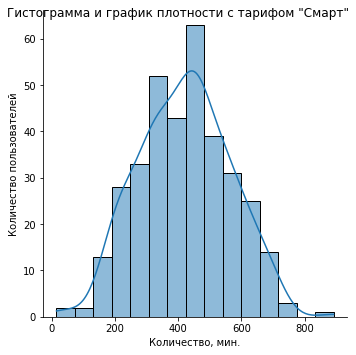

In [97]:
hist_kde(df_cal_month_user_sum, 'smart', 'col_mean_min', 'Количество, мин.')

Выведим гистограмму и график плотности по количеству звонков с тарифом `Ультра`

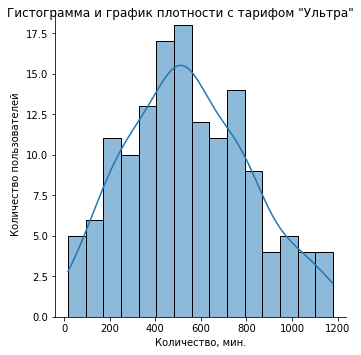

In [98]:
hist_kde(df_cal_month_user_sum, 'ultra', 'col_mean_min', 'Количество, мин.')

In [99]:
def twice_hist(data, column, title, xlabel):
    ax = data[data['tariff'] == 'smart'][column].plot(kind='hist', bins=20, alpha=.9, figsize=(13,7), legend=True);
    ax.set_title(title);
    data[data['tariff'] == 'ultra'][column].plot(kind='hist', bins=20, ax=ax, alpha=.7, figsize=(13,7), legend=True);
    ax.set_xlabel(xlabel);
    ax.set_ylabel('Количество пользователей');
    ax.legend(["smart", "ultra"]);

Построим гистограммы с наложением, в котором мы сможем сравнить два тарифа Смарт и Ультра в плане звонков:

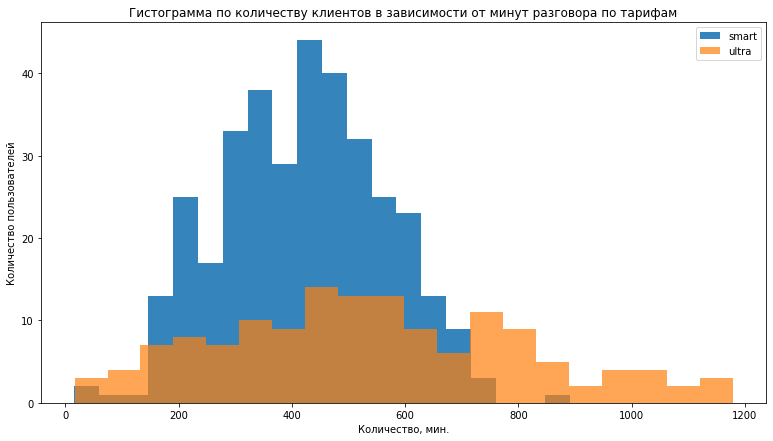

In [100]:
twice_hist(df_cal_month_user_sum, 'col_mean_min', 'Гистограмма по количеству клиентов в зависимости от минут разговора по тарифам', 'Количество, мин.')

По графику мы видим, что на тарифе Смарт более сконцентрированны разговоры в пределая 180 до 700 минут разговоров, основная масса сосредоточена здесь. А на тарифе Ультра более распределенное положение, нет четкой определенности "кучности", достаточно плавное, даже относительно тарифа ультра ровное, распределение по графику, плюс к этому мы можем увидеть, что максимальное распределение разговоров уходит до 1200 мин.

#### Вывод

По тарифу "**Смарт**".

Средняя величина минут разговоров составляет - 420.8 мин. в месяц

Гистограмма и график плотностей показывает нормальное распределение с немного отрицательной скошенностью, это подтвержает и величина медианы в 425.25 мин., которая немного больше среднего.

Стандартное отклонение - 143.4

С вероятностью 68% основная масса пользователей в среднем совершает звонков от 277.3 до 564.3 мин. в месяц

С вероятностью 95% основная масса пользователей в среднем совершает звонков от 133.9 до 707.7 мин. в месяц

С вероятностью 99% основная масса пользователей в среднем совершает звонков от 15.11 до 851.2 мин. в месяц

Стоит отметить, что на тарифе Смарт очень много абонентов превышают лимит в 500 мин по абонентской плате. И оплачивают по сверхтарифному счетчику.

По тарифу "**Ультра**".

Средняя величина минут разговоров составляет -  547.0 мин. в месяц

Гистограмма и график плотностей показывает нормальное распределение с положительной скошенностью, это подтвержает и величина медианы в 525.5 мин., которая меньше среднего.

Стандартное отклонение - 268.1

С вероятностью 68% основная масса пользователей в среднем совершает звонков от 278.9 до 815.1 мин. в месяц

С вероятностью 95% основная масса пользователей в среднем совершает звонков от 16.5 до 1083.2 мин. в месяц

С вероятностью 99% основная масса пользователей в среднем совершает звонков от 16.5 до 1351.3 мин. в месяц


### Сообщения

Для анализа используем датафрейм `df_mes_month_user` в котором мы сформировали кол-во минут разговоров по каждому клиенту помесячно.

In [101]:
df_mes_month_user.head()

month_iter,user_id,tariff,01_Январь,02_Февраль,03_Март,04_Апрель,05_Май,06_Июнь,07_Июль,08_Август,09_Сентябрь,10_Октябрь,11_Ноябрь,12_Декабрь
0,1000,ultra,0,0,0,0,22,60,75,81,57,73,58,70
1,1002,smart,0,0,0,0,0,4,11,13,4,10,16,12
2,1003,ultra,0,0,0,0,0,0,0,37,91,83,94,75
3,1004,ultra,0,0,0,0,95,134,181,151,146,165,158,162
4,1005,smart,7,38,56,41,42,47,56,64,52,44,51,54


Чтобы посчитать количество месяцев использования связи, заменим значения кол-ва разговоров на 1, посчитаем их сумму и сохраним в новом датафрейме `df_cal_month_user_count_sum` в отдельном столбце

In [102]:
#создаем датафрейм df_mes_month_user_count_sum
df_mes_month_user_count_sum = df_mes_month_user.copy()

#заменяем все значения более 0 на 1
df_mes_month_user_count_sum[df_columns] = np.where((df_mes_month_user_count_sum[df_columns] > 0), 1, df_mes_month_user_count_sum[df_columns])

#суммируем полученные значения по рабочим месяцам
df_mes_month_user_count_sum['mes_month_count'] = df_mes_month_user_count_sum[df_columns].sum(axis=1)

Добавим столбец с кол-вом месяцев пользования в основной датафрейм `df_mes_month_user`

In [103]:
df_mes_month_user['mes_month_count'] = df_mes_month_user_count_sum['mes_month_count']

Добавим столбец в датафрейм `df_mes_month_user` в котором разместим общее количество разговоров по каждому

In [104]:
df_mes_month_user['mes_total_min'] = df_mes_month_user[df_columns].sum(axis=1)

Создадим столбец со средними значениями разговоров по каждому пользователю, столбец назовем `mes_mean_min`. Для вычисления средней величины разделим общее кол-во мин. разговора на количество месяцев пользования и окрулим до 2 единиц после запятой.

In [105]:
df_mes_month_user['mes_mean_min'] = round(df_mes_month_user['mes_total_min'] / df_mes_month_user['mes_month_count'], 2)

Выведим полученный результат

In [106]:
df_mes_month_user.head(3)

month_iter,user_id,tariff,01_Январь,02_Февраль,03_Март,04_Апрель,05_Май,06_Июнь,07_Июль,08_Август,09_Сентябрь,10_Октябрь,11_Ноябрь,12_Декабрь,mes_month_count,mes_total_min,mes_mean_min
0,1000,ultra,0,0,0,0,22,60,75,81,57,73,58,70,8,496,62.0
1,1002,smart,0,0,0,0,0,4,11,13,4,10,16,12,7,70,10.0
2,1003,ultra,0,0,0,0,0,0,0,37,91,83,94,75,5,380,76.0


На основании построенных данных найдем среднее количество сообщений на каждого пользователя в каждом тарифе. Сохраним их в переменных `mean_mes_smart` и `mean_mes_ultra`

In [107]:
mean_mes_smart = round(df_mes_month_user[df_mes_month_user['tariff'] == 'smart']['mes_mean_min'].mean(), 1)
mean_mes_ultra = round(df_mes_month_user[df_mes_month_user['tariff'] == 'ultra']['mes_mean_min'].mean(), 1)
print(f'Мы видим, что на тарифе "smart" среднее значение количества сообщений в месяц - {mean_mes_smart} шт., на тарифе "ultra" - {mean_mes_ultra} шт.')

Мы видим, что на тарифе "smart" среднее значение количества сообщений в месяц - 37.6 шт., на тарифе "ultra" - 64.6 шт.


Расчитаем дисперсию по каждому тарифу и сохраним в переменные `variance_mes_smart` и `variance_mes_ultra`

In [108]:
variance_mes_smart = np.var(df_mes_month_user[df_mes_month_user['tariff'] == 'smart']['mes_mean_min'], ddof=1)
variance_mes_ultra = np.var(df_mes_month_user[df_mes_month_user['tariff'] == 'ultra']['mes_mean_min'], ddof=1)
print(f'На тарифе "smart" дисперсия - {variance_mes_smart}, на тарифе "ultra" - {variance_mes_ultra}.')

На тарифе "smart" дисперсия - 617.5089709060306, на тарифе "ultra" - 1882.756530474692.


Расчитаем стандартное отклонение по каждому тарифу и сохраним в переменные `std_cal_smart` и `std_cal_ultra`

In [109]:
std_mes_smart = np.sqrt(variance_mes_smart)
std_mes_ultra = np.sqrt(variance_mes_ultra)
print(f'На тарифе smart стандартное отклонение - {std_mes_smart}, на тарифе ultra - {std_mes_ultra}.')

На тарифе smart стандартное отклонение - 24.849727783338608, на тарифе ultra - 43.3907424512959.


Расчитаем медиану по каждому тарифу и сохраним в переменные `median_cal_smart` и `median_cal_ultra`

In [110]:
median_mes_smart = df_mes_month_user[df_mes_month_user['tariff'] == 'smart']['mes_mean_min'].median()
median_mes_ultra = df_mes_month_user[df_mes_month_user['tariff'] == 'ultra']['mes_mean_min'].median()
print(f'Мы видим, что на тарифе "smart" медиана - {median_mes_smart} шт., на тарифе "ultra" - {median_mes_ultra} шт.')

Мы видим, что на тарифе "smart" медиана - 33.0 шт., на тарифе "ultra" - 57.8 шт.


Выведим минимальные средние показатели по каждому тарифу, эти значения нам понадобятся для вычисления интервалов основных показателей:

In [111]:
min_mes_smart = df_mes_month_user[df_mes_month_user['tariff'] == 'smart']['mes_mean_min'].min()
min_mes_ultra = df_mes_month_user[df_mes_month_user['tariff'] == 'ultra']['mes_mean_min'].min()

Выведим, по правилу трех сигм, основной интервал средних значений по каждому тарифу:

In [112]:
sigma_interval(mean_mes_smart, mean_mes_ultra, min_mes_smart, min_mes_ultra, std_mes_smart, std_mes_ultra, 'отправляет сообщеий', 'раз')


    По тарифу "Смарт":
    1. С вероятностью 68% основная масса пользователей в среднем отправляет сообщеий от 12.8 до 62.4 раз в месяц
    2. С вероятностью 95% основная масса пользователей в среднем отправляет сообщеий от 1.0 до 87.3 раз в месяц
    3. С вероятностью 99% основная масса пользователей в среднем отправляет сообщеий от 1.0 до 112.1 раз в месяц

    По тарифу "Ультра":
    1. С вероятностью 68% основная масса пользователей в среднем отправляет сообщеий от 21.2 до 108.0 раз в месяц
    2. С вероятностью 95% основная масса пользователей в среднем отправляет сообщеий от 3.0 до 151.4 раз в месяц
    3. С вероятностью 99% основная масса пользователей в среднем отправляет сообщеий от 3.0 до 194.8 раз в месяц


Выведим гистограмму и график плотности по сообщениям с тарифом `Смарт`

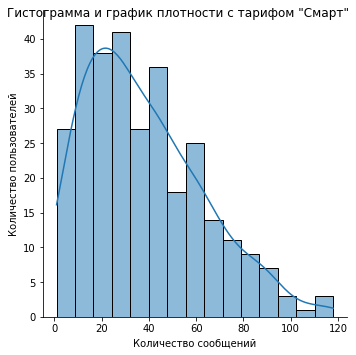

In [113]:
hist_kde(df_mes_month_user, 'smart', 'mes_mean_min', 'Количество сообщений')

Выведим гистограмму и график плотности по сообщениям с тарифом `Ультра`

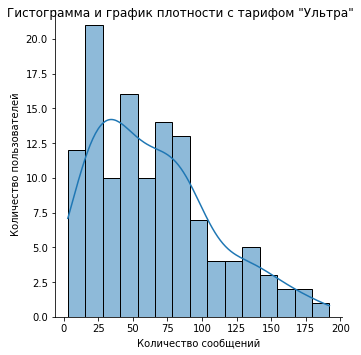

In [114]:
hist_kde(df_mes_month_user, 'ultra', 'mes_mean_min', 'Количество сообщений')

Построим гистограммы с наложением, в котором мы сможем сравнить два тарифа Смарт и Ультра в плане отправки сообщений:

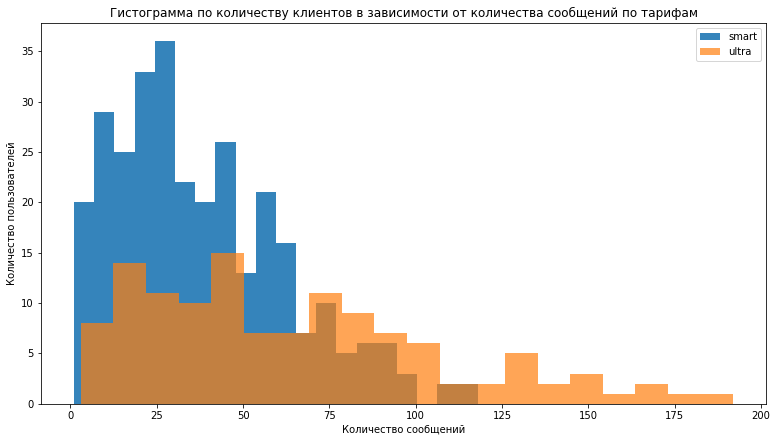

In [115]:
twice_hist(df_mes_month_user, 'mes_mean_min', 'Гистограмма по количеству клиентов в зависимости от количества сообщений по тарифам', 'Количество сообщений')

По графику мы видим, что на тарифе Смарт более сконцентрированна отправка сообщений в пределах от 1 до 60 шт., основная масса сосредоточена здесь. А на тарифе Ультра более распределенное положение, больше сосредоточено от 3 до 105 шт, плюс к этому мы можем увидеть, что максимальное распределение сообщений уходит до 190 шт.


#### Вывод

По тарифу "**Смарт**".

Средняя величина отправления сообщений составляет - 37.6 шт. в месяц

Гистограмма и график плотностей показывает нормальное распределение с положительной скошенностью, это подтвержает и величина медианы в 33.0 шт., которая меньше среднего.

Стандартное отклонение - 24.8 

С вероятностью 68% основная масса пользователей в среднем отправляет сообщеий от 12.8 до 62.4 раз в месяц

С вероятностью 95% основная масса пользователей в среднем отправляет сообщеий от 1.0 до 87.3 раз в месяц

С вероятностью 99% основная масса пользователей в среднем отправляет сообщеий от 1.0 до 112.1 раз в месяц


По тарифу "**Ультра**".

Средняя величина отправления сообщений составляет - 64.6 шт. в месяц

Гистограмма и график плотностей показывает нормальное распределение с положительной скошенностью, это подтвержает и величина медианы в 57.8 шт., которая меньше среднего.

Стандартное отклонение - 43.4

С вероятностью 68% основная масса пользователей в среднем отправляет сообщеий от 21.2 до 108.0 раз в месяц

С вероятностью 95% основная масса пользователей в среднем отправляет сообщеий от 3.0 до 151.4 раз в месяц

С вероятностью 99% основная масса пользователей в среднем отправляет сообщеий от 3.0 до 194.8 раз в месяц

Стоит отметить, что на тарифе Смарт есть значителная доля клиентов отправляющие больше лимита сообщений в 50 сообщений, в рамках абон платы.

### Интернет

Для анализа используем датафрейм `df_int_month_user`, в котором мы сформировали кол-во минут разговоров по каждому клиенту помесячно.

Переведем формат данных в столбцах с кол-вом мин разговора в `int`

In [116]:
df_int_month_user[df_columns] = df_int_month_user[df_columns].astype(int)

Чтобы посчитать количество месяцев использования связи, заменим значения кол-ва разговоров на 1, посчитаем их сумму и сохраним в новом датафрейме `df_int_month_user_count_sum` в отдельном столбце

In [117]:
#создаем датафрейм df_mes_month_user_count_sum
df_int_month_user_count_sum = df_int_month_user.copy()

#заменяем все значения более 0 на 1
df_int_month_user_count_sum[df_columns] = np.where((df_int_month_user_count_sum[df_columns] > 0), 1, df_int_month_user_count_sum[df_columns])

#суммируем полученные значения по рабочим месяцам
df_int_month_user_count_sum['int_month_count'] = df_int_month_user_count_sum[df_columns].sum(axis=1)

Добавим столбец с кол-вом месяцев пользования в основной датафрейм `df_mes_month_user`

In [118]:
df_int_month_user['int_month_count'] = df_int_month_user_count_sum['int_month_count']

Добавим столбец в датафрейм `df_mes_month_user` в котором разместим общее количество разговоров за год по каждому клиенту

In [119]:
df_int_month_user['int_total_min'] = df_int_month_user[df_columns].sum(axis=1)

Создадим столбец со средними значениями разговоров по каждому пользователю, столбец назовем `mes_mean_min`. Для вычисления средней величины разделим общее кол-во мин. разговора на количество месяцев пользования и окрулим до 2 единиц после запятой.

In [120]:
df_int_month_user['int_mean_min'] = round(df_int_month_user['int_total_min'] / df_int_month_user['int_month_count'], 2)

Выведим полученный результат

In [121]:
df_int_month_user.head(3)

month_iter,user_id,tariff,01_Январь,02_Февраль,03_Март,04_Апрель,05_Май,06_Июнь,07_Июль,08_Август,09_Сентябрь,10_Октябрь,11_Ноябрь,12_Декабрь,int_month_count,int_total_min,int_mean_min
0,1000,ultra,0,0,0,0,3,23,14,14,15,15,15,10,8,109,13.62
1,1001,smart,0,0,0,0,0,0,0,0,0,0,18,14,2,32,16.00
2,1002,smart,0,0,0,0,0,11,18,20,17,14,19,18,7,117,16.71


На основании построенных данных найдем среднее количество скаченного объема интернета на каждого пользователя в каждом тарифе. Сохраним их в переменных `mean_int_smart` и `mean_int_ultra`

In [122]:
mean_int_smart = round(df_int_month_user[df_int_month_user['tariff'] == 'smart']['int_mean_min'].mean(), 1)
mean_int_ultra = round(df_int_month_user[df_int_month_user['tariff'] == 'ultra']['int_mean_min'].mean(), 1)
print(f'Мы видим, что на тарифе "smart" среднее значение количества скаченного объема интернета в месяц - {mean_int_smart} Гб., на тарифе "ultra" - {mean_int_ultra} Гб.')

Мы видим, что на тарифе "smart" среднее значение количества скаченного объема интернета в месяц - 16.3 Гб., на тарифе "ultra" - 19.8 Гб.


Расчитаем дисперсию по каждому тарифу и сохраним в переменные `variance_int_smart` и `variance_int_ultra`

In [123]:
variance_int_smart = np.var(df_int_month_user[df_int_month_user['tariff'] == 'smart']['int_mean_min'], ddof=1)
variance_int_ultra = np.var(df_int_month_user[df_int_month_user['tariff'] == 'ultra']['int_mean_min'], ddof=1)
print(f'На тарифе "smart" дисперсия - {variance_int_smart}, на тарифе "ultra" - {variance_int_ultra}.')

На тарифе "smart" дисперсия - 12.55998187801883, на тарифе "ultra" - 63.513625114155246.


Расчитаем стандартное отклонение по каждому тарифу и сохраним в переменные `std_int_smart` и `std_int_ultra`

In [124]:
std_int_smart = np.sqrt(variance_int_smart)
std_int_ultra = np.sqrt(variance_int_ultra)
print(f'На тарифе smart стандартное отклонение - {std_int_smart}, на тарифе ultra - {std_int_ultra}.')

На тарифе smart стандартное отклонение - 3.544006472626543, на тарифе ultra - 7.969543595097228.


Расчитаем медиану по каждому тарифу и сохраним в переменные `median_cal_smart` и `median_cal_ultra`

In [125]:
median_int_smart = df_int_month_user[df_int_month_user['tariff'] == 'smart']['int_mean_min'].median()
median_int_ultra = df_int_month_user[df_int_month_user['tariff'] == 'ultra']['int_mean_min'].median()
print(f'Мы видим, что на тарифе "smart" медиана - {median_int_smart} Гб., на тарифе "ultra" - {median_int_ultra} Гб.')

Мы видим, что на тарифе "smart" медиана - 16.33 Гб., на тарифе "ultra" - 19.11 Гб.


Выведим минимальные средние показатели по каждому тарифу, эти значения нам понадобятся для вычисления интервалов основных показателей:

In [126]:
min_int_smart = df_int_month_user[df_int_month_user['tariff'] == 'smart']['int_mean_min'].min()
min_int_ultra = df_int_month_user[df_int_month_user['tariff'] == 'ultra']['int_mean_min'].min()

Выведим, по правилу трех сигм, основной интервал средних значений по каждому тарифу:

In [127]:
sigma_interval(mean_int_smart, mean_int_ultra, min_int_smart, min_int_ultra, std_int_smart, std_int_ultra, 'использует Интернет', 'Гб.')


    По тарифу "Смарт":
    1. С вероятностью 68% основная масса пользователей в среднем использует Интернет от 12.8 до 19.8 Гб. в месяц
    2. С вероятностью 95% основная масса пользователей в среднем использует Интернет от 9.2 до 23.4 Гб. в месяц
    3. С вероятностью 99% основная масса пользователей в среднем использует Интернет от 5.73 до 26.9 Гб. в месяц

    По тарифу "Ультра":
    1. С вероятностью 68% основная масса пользователей в среднем использует Интернет от 11.8 до 27.8 Гб. в месяц
    2. С вероятностью 95% основная масса пользователей в среднем использует Интернет от 3.9 до 35.7 Гб. в месяц
    3. С вероятностью 99% основная масса пользователей в среднем использует Интернет от 2.5 до 43.7 Гб. в месяц


Построим гистограмму и график плотности по использованию интернета с тарифом `Ультра`

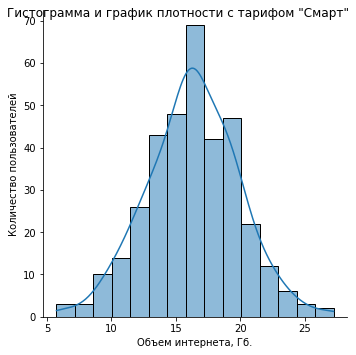

In [128]:
hist_kde(df_int_month_user, 'smart', 'int_mean_min', 'Объем интернета, Гб.')

Построим гистограмму и график плотности по использованию интернета с тарифом `Ультра`

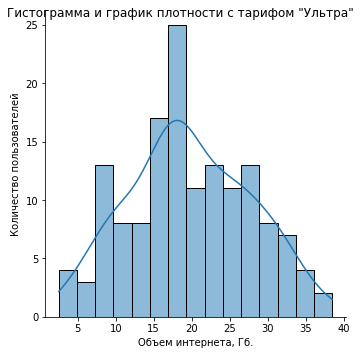

In [129]:
hist_kde(df_int_month_user, 'ultra', 'int_mean_min', 'Объем интернета, Гб.')

Построим гистограммы с наложением, в котором мы сможем сравнить два тарифа Смарт и Ультра в плане интернет трафика:

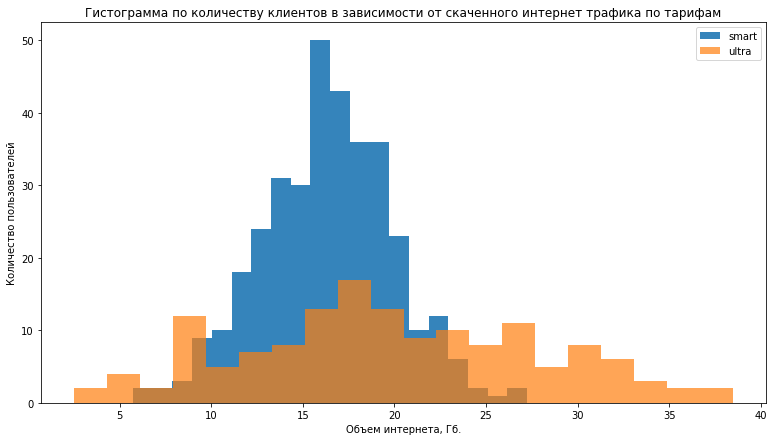

In [130]:
twice_hist(df_int_month_user, 'int_mean_min', 'Гистограмма по количеству клиентов в зависимости от скаченного интернет трафика по тарифам', 'Объем интернета, Гб.')

По графику мы видим, что на тарифе Смарт более сконцентрированн интернет трафик в пределая 9 до 23 Гб, основная масса сосредоточена здесь. На тарифе Ультра более распределенное положение, нет четкой определенности "кучности", достаточно плавное, распределение по графику, плюс к этому мы можем увидеть, что максимальное распределение интернет трафика уходит до 36 Гб.

#### Вывод

По тарифу "**Смарт**".

Средняя величина использования интернета составляет - 16.3 Гб. в месяц

Гистограмма и график плотностей показывает нормальное распределение, симметричное, это подтвержает и величина медианы в 16.33 Гб., которая равна средней

Стандартное отклонение - 3.5 

С вероятностью 68% основная масса пользователей в среднем использует Интернет от 12.8 до 19.8 Гб. в месяц

С вероятностью 95% основная масса пользователей в среднем использует Интернет от 9.2 до 23.4 Гб. в месяц

С вероятностью 99% основная масса пользователей в среднем использует Интернет от 5.73 до 26.9 Гб. в месяц


По тарифу "**Ультра**".

Средняя величина использования интернета составляет - 19.8 Гб. в месяц

Гистограмма и график плотностей показывает нормальное распределение с слегка положительной скошенностью, это подтвержает и величина медианы в 19.11 Гб., которая немного меньше среднего.

Стандартное отклонение - 7.9

С вероятностью 68% основная масса пользователей в среднем использует Интернет от 11.8 до 27.8 Гб. в месяц

С вероятностью 95% основная масса пользователей в среднем использует Интернет от 3.9 до 35.7 Гб. в месяц

С вероятностью 99% основная масса пользователей в среднем использует Интернет от 2.5 до 43.7 Гб. в месяц


Стоит также подчеркнуть, что большая часть клиентов тарифа Смарт пользуется с превышением лимита в 15 Гб включенного в абон плату. На тарифе Ультра есть, но относительно не значительное превышение.

## Проверка гипотез

В проверке гипотез будем использовать датафрейм `df_user_month_tarif_over_total_rub` с данными по доходам, который мы ранее подготовили.

In [131]:
df_user_month_tarif_over_total_rub.head(1)

,user_id,tariff,01_Январь,02_Февраль,03_Март,04_Апрель,05_Май,06_Июнь,07_Июль,08_Август,09_Сентябрь,10_Октябрь,11_Ноябрь,12_Декабрь,month_count,general_income
0,1000,ultra,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950,8,15600


Добавим столбец `mean_user_income` в данный датафрейм, в котором разместим среднее значения дохода в месяц по каждому пользователяю. Для этого разделим общий доход на кол-во месяцев пользования.

In [132]:
df_user_month_tarif_over_total_rub['mean_user_income'] = round(df_user_month_tarif_over_total_rub['general_income'] / df_user_month_tarif_over_total_rub['month_count'], 1).fillna(0)

Посчитаем средний доход по тарифу Смарт в среднем на одного клиента

In [133]:
print(f"Средний доход на одного клиента по тарифу Смарт составляет - {round(df_user_month_tarif_over_total_rub[df_user_month_tarif_over_total_rub['tariff'] == 'smart']['mean_user_income'].mean(),1)}")

Средний доход на одного клиента по тарифу Смарт составляет - 1320.6


Посчитаем средний доход по тарифу Ультра в среднем на одного клиента

In [134]:
print(f"Средний доход на одного клиента по тарифу Ультра составляет - {round(df_user_month_tarif_over_total_rub[df_user_month_tarif_over_total_rub['tariff'] == 'ultra']['mean_user_income'].mean(),1)}")

Средний доход на одного клиента по тарифу Ультра составляет - 2072.5


Выведим полученный результат

In [135]:
df_user_month_tarif_over_total_rub.head(1)

,user_id,tariff,01_Январь,02_Февраль,03_Март,04_Апрель,05_Май,06_Июнь,07_Июль,08_Август,09_Сентябрь,10_Октябрь,11_Ноябрь,12_Декабрь,month_count,general_income,mean_user_income
0,1000,ultra,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950,8,15600,1950.0


### Гипотеза №1

Нам необходимо проверить гипотезу "Средняя выручка пользователей тарифов Ультра и Смарт различаются"

<p>Введем основную и альтернативные гипотезы:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средняя выручка пользователей тарифов Ультра и Смарт различаются}\\
   H_1 :\text{Средняя выручка пользователей тарифов Ультра и Смарт равны}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$

Выделим совокупности значений средней выручки по каждому пользователю по каждому тарифу. На них будем проверять гипотезы

In [136]:
# smart = df_user_month_tarif_over_total_rub[df_user_month_tarif_over_total_rub['tariff'] == 'smart']['mean_user_income'].copy()
# ultra = df_user_month_tarif_over_total_rub[df_user_month_tarif_over_total_rub['tariff'] == 'ultra']['mean_user_income'].copy()

Напишем функцию по которой сведем все доходы по месяцам в по каждому тарифу в единый список.

In [137]:
def income_tariff(tarif):
    '''Функция формирует список доходов по всем месяцам по соответствующему тарифу'''
    
    lst = []
    
    if tarif == 'smart':
        for month in df_columns:
            lst.extend(list(df_user_month_tarif_over_total_rub[df_user_month_tarif_over_total_rub['tariff'] == 'smart'][month]))
    elif tarif == 'ultra':
        for month in df_columns:
            lst.extend(list(df_user_month_tarif_over_total_rub[df_user_month_tarif_over_total_rub['tariff'] == 'ultra'][month]))
    
    
    return list(filter(lambda x: x != 0, lst))
    

Создадим series по каждому тарифу для дальнейшего исследования

In [138]:
smart = pd.Series(income_tariff('smart'))
ultra = pd.Series(income_tariff('ultra'))

#### Проверим на нормальность распределения

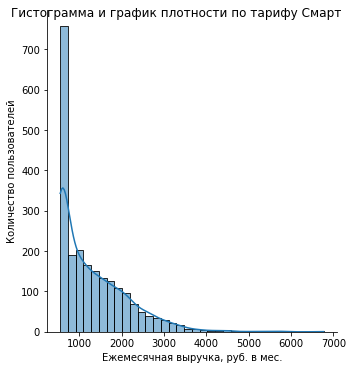

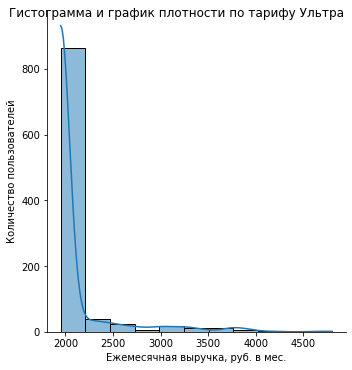

In [139]:
ax = sns.displot(smart, kde=True);
ax.fig.suptitle('Гистограмма и график плотности по тарифу Смарт');
ax.set_axis_labels('Ежемесячная выручка, руб. в мес.' , 'Количество пользователей');
ax = sns.displot(ultra, kde=True);
ax.fig.suptitle('Гистограмма и график плотности по тарифу Ультра');
ax.set_axis_labels('Ежемесячная выручка, руб. в мес.' , 'Количество пользователей');

In [140]:
# hist_kde(df_user_month_tarif_over_total_rub, 'smart', 'mean_user_income', 'Средняя выручка, руб. в мес.')
# hist_kde(df_user_month_tarif_over_total_rub, 'ultra', 'mean_user_income', 'Средняя выручка, руб. в мес.')

#### Вывод

График плотности и гистограмма показывают нормальное распределение на проверяемых тарифах в каждом с справосторонней скошенностью.

#### Проверка нормального распределения при помощи QQ-графиков

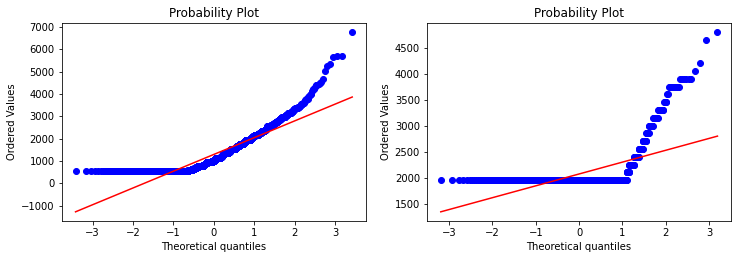

In [141]:
# строим qq-plot для нормального распределения
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
st.probplot(smart, dist="norm", plot=plt)
plt.subplot(2,2,2)
st.probplot(ultra, dist="norm", plot=plt)
plt.show()

#### Вывод

Графики Q-Q скорее показывают ненормальное распределение.

#### Проверка гипотезы

Установим критический уровень статистической значимости в размере 5%

In [142]:
alpha = .05

#### Двусторонняя проверка

Проверим гипотезу о равенстве средних двух независимых совокупностей:

Посчитаем p-value, используя ttest из библиотеки scipy для сравнения средних двух выборок.

In [143]:
result_tariff = st.ttest_ind(smart, ultra, equal_var=False)

In [144]:
print('Результат p-value -', result_tariff.pvalue)

Результат p-value - 4.2606313931076085e-250


Если (1 - p-value) будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу о различии средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [145]:
if (1 - result_tariff.pvalue) < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Не получилось отвергнуть нулевую гипотезу


Воспользуемся тем, что выборки связаны:

In [146]:
result_tariff = st.ttest_ind(smart, ultra)

print('Результат p-value -', result_tariff.pvalue)

if 1 - result_tariff.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Результат p-value - 1.4229814360764067e-160
Не получилось отвергнуть нулевую гипотезу


#### Вывод

P-value получилось меньше выбранного уровня  𝛼=0.05 . Данные не позволили отвергнуть нулевую гипотезу, поэтому средние выручки клиентов тарифов Смарт и Ультра различаются

#### Непараметрический тест Манна-Уитни

#### Двусторонняя проверка

Гипотезы оставим прежние, как в прошлой проверке.

Если (1 - p-value) будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу о различии средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [147]:
results = st.mannwhitneyu(smart, ultra, alternative='two-sided')
print('p-значение: ', results.pvalue)

if (1 - results.pvalue) < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.9803845594554806e-187
Не получилось отвергнуть нулевую гипотезу


#### Вывод

P-value получилось больше выбранного уровня  𝛼=0.05 . Данные не позволили отвергнуть нулевую гипотезу, поэтому средние выручки клиентов тарифов Смарт и Ультра различаются

### Вывод

Мы успешно проверили гипотезу тремя методами, в результате сделали вывод, что средние выручки клиентов тарифов Смарт и Ультра различаются

### Гипотеза №2

Нам необходимо проверить гипотезу "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"

#### Подготовка данных для проверки гипотезы

Для проверки данной гипотезы, нам необходимо создать совокупности значений средней выручки по Москве и другим регионам. Для этого к датафрейму `df_user_month_tarif_over_total_rub` добавим столбец с регионами.

In [148]:
df_user_month_tarif_over_total_rub['city'] = df_use['city']

Создадим функцию с помощью которой мы категоризируем данные, поделим данные на категории "Москва" и "Регион".

In [149]:
def change_reg(row):
    if row['city'] == 'Москва':
        return 'Москва'
    else:
        return 'Регион'

Применим функцию к датафрейму `df_user_month_tarif_over_total_rub`

In [150]:
df_user_month_tarif_over_total_rub['city_categ'] = df_user_month_tarif_over_total_rub.apply(change_reg, axis=1)

Выведим состав датафрейма по созданным категориям

In [151]:
df_user_month_tarif_over_total_rub['city_categ'].value_counts()

Регион    401
Москва     99
Name: city_categ, dtype: int64

У нас получилось, что в нашей выборке из Москвы - 99 абонентов, из регионов - 401.

Напишем функцию по которой сведем все доходы по месяцам в по каждому региону в единый список.

In [152]:
def income_region(region):
    '''Функция формирует список доходов по всем месяцам по соответствующему региону'''
    
    lst = []
    
    if region == 'Москва':
        for month in df_columns:
            lst.extend(list(df_user_month_tarif_over_total_rub[df_user_month_tarif_over_total_rub['city_categ'] == 'Москва'][month]))
    elif region == 'Регион':
        for month in df_columns:
            lst.extend(list(df_user_month_tarif_over_total_rub[df_user_month_tarif_over_total_rub['city_categ'] == 'Регион'][month]))
    
    
    return list(filter(lambda x: x != 0, lst))
    

Выделим совокупности значений средней выручки по каждому пользователю по Москве и регионам. На них будем проверять гипотезы

Создадим series по каждому региону для дальнейшего исследования

In [153]:
moscow = pd.Series(income_region('Москва'))
region = pd.Series(income_region('Регион'))

In [154]:
# moscow = df_user_month_tarif_over_total_rub[df_user_month_tarif_over_total_rub['city_categ'] == 'Москва']['mean_user_income'].copy()
# region = df_user_month_tarif_over_total_rub[df_user_month_tarif_over_total_rub['city_categ'] == 'Регион']['mean_user_income'].copy()

#### Вывод

Мы успешно подготовили необходимые данные для проверки второй гипотезы.

#### Проверка гипотез

<p>Введем основную и альтернативные гипотезы:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средняя выручка пользователей из Москвы и регионов различаются}\\
   H_1 :\text{Средняя выручка пользователей из Москвы и регионов равны}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$

#### Проверим на нормальность распределения

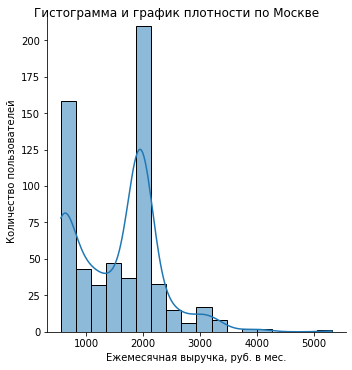

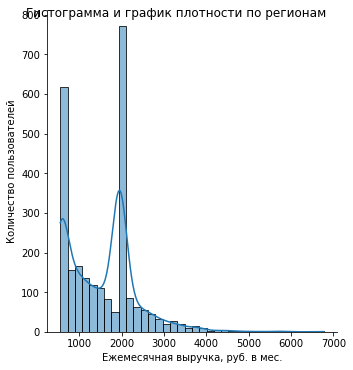

In [155]:
ax = sns.displot(moscow, kde=True);
ax.fig.suptitle('Гистограмма и график плотности по Москве');
ax.set_axis_labels('Ежемесячная выручка, руб. в мес.' , 'Количество пользователей');
ax = sns.displot(region, kde=True);
ax.fig.suptitle('Гистограмма и график плотности по регионам');
ax.set_axis_labels('Ежемесячная выручка, руб. в мес.' , 'Количество пользователей');

In [156]:
print(f"Среднее значение по Москве - {moscow.mean()}")
print(f"Медианное значение по Москве - {moscow.median()}")
print(f"Среднее значение по регионам - {region.mean()}")
print(f"Медианное значение по регионам - {region.median()}")

Среднее значение по Москве - 1546.7135842880523
Медианное значение по Москве - 1750.0
Среднее значение по регионам - 1524.9362274298885
Медианное значение по регионам - 1583.0


#### Вывод

График плотности, гистограмма и сравнение средней и медианного значения показывают нормальное распределение на проверяемых регионах со левосторонней скошенностью в Москве и немного правосторонней скошенностью в регионах.

#### Проверка нормального распределения при помощи QQ-графиков

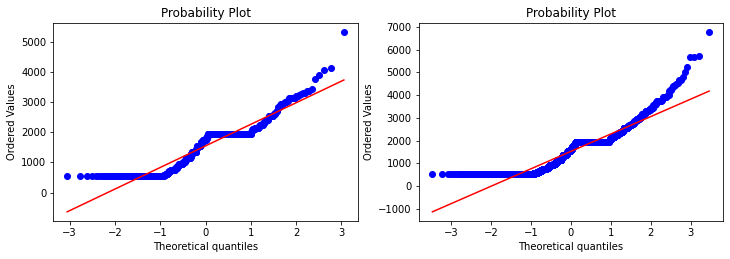

In [157]:
# строим qq-plot для нормального распределения
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
st.probplot(moscow, dist="norm", plot=plt)
plt.subplot(2,2,2)
st.probplot(region, dist="norm", plot=plt)
plt.show()

#### Вывод

Графики также показывают нормальное распределение.

#### Проверка гипотезы

Установим критический уровень статистической значимости в размере 5%

In [158]:
alpha = .05

#### Двусторонняя проверка

Проверим гипотезу о равенстве средних двух независимых совокупностей:

Посчитаем p-value, используя ttest из библиотеки scipy для сравнения средних двух выборок.

In [159]:
result_tariff = st.ttest_ind(moscow, region, equal_var=False)

In [160]:
print('Результат p-value -', result_tariff.pvalue)

Результат p-value - 0.5257376663729298


Если (1 - p-value) будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу о различии средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [161]:
if 1 - result_tariff.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Не получилось отвергнуть нулевую гипотезу


Воспользуемся тем, что выборки связаны:

In [162]:
result_tariff = st.ttest_ind(moscow, region)

print('Результат p-value -', result_tariff.pvalue)

if 1 - result_tariff.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Результат p-value - 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


#### Вывод

P-value получилось больше выбранного уровня  𝛼=0.05 . Данные не позволили отвергнуть нулевую гипотезу - средние выручки клиентов в Москве и регионах различаются

#### Непараметрический тест Манна-Уитни

#### Двусторонняя проверка

Гипотезы оставим прежние, как в прошлой проверке.

Если (1 - p-value) будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу о различии средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [163]:
results = st.mannwhitneyu(moscow, region, alternative='two-sided')
print('p-значение: ', results.pvalue)

if (1 - results.pvalue) < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.37423394910366004
Не получилось отвергнуть нулевую гипотезу


#### Вывод

P-value получилось больше выбранного уровня  𝛼=0.05 . Данные не позволили отвергнуть нулевую гипотезу - средние выручки клиентов Москвы и регионов различаются

### Вывод

Мы успешно провели проверку второй гипотезы тремя методами, в результате сделали вывод, что средние выручки клиентов Москвы и регионов различаются

## Общий вывод

Мы провели большую работу по обработке данных, подготовке данных, провели исследовательский анализ, провели проверку двух гипотез.

Изначально нам было предоставлено 5 файлов с данными. Мы выгрузили и изучили эти данные. Провели предподготовку данных, удалили не нужные данные, переименовали ряд заголовков, изменили типы данных в тех столбцах, которые необходимы. 

Провели подготовку данных для анализа данных. Вычислили и добавили необходимые данные. Подготовили данные по каждой услуге: звонкам, сообщениям и интернету. Посчитали количество израсходованных минут, включая минуты, превышающие лимит включенные в абонентскую плату, посчитали количество звонков. Провели подобную работу, сделали вычисления и с сообщениями и интернетом.

Посчитали выручку по каждому пользователю помесячно по каждому тарифу. Вычислили у каждого помесячно абонентскую плату и плату сверх абонентской. Вычислили количество месяцев работы по каждому абоненту, среднегодовые доходы по каждому клиенту.

Провели анализ данных по звонкам, сообщениям, интернету. По каждому тарифу сделали вычисления.

Определили среднее значение по количеству разговоров, в тарифе Смарт — это 420,8 мин., в тарифе Ультра - 547 мин. 

Определили среднее значение по количеству сообщений в тарифе Смарт — это 37,6 шт., в тарифе Ультра - 64,6 шт. 

Определили среднее значение по количеству интернет-трафика, в тарифе Смарт это 16,3 Гб., в тарифе Ультра - 19,8 Гб. 

По каждой услуге посчитали вероятностные интервалы по средним значениям по каждому тарифу. Построили гистограммы и графики плотности. Вычислили и другие показатели.

Определили распределения.

Провели проверку 2х основных гипотез по заданию.

Определили, в каждой основной гипотезе, нулевую и альтернативную гипотезу.
Подготовили данные для проверки гипотез. Определили нормальное распределение.
Далее используя двустороннюю проверку и непараметрический тест Манна-Уитни, пришли к таким выводам:

По первой гипотезе. Средние выручки клиентов тарифов Смарт и Ультра различаются.
По второй гипотезе. Средние выручки клиентов Москвы и регионов различаются.

Отвечая на вопрос "Какой тариф лучше?" есть следующие ответы:
1. Если исходить из того, что оценивать по среднеабонентскому приходу и то, что клиентов на каждом тарифе будет одинаково то выгоднее тариф Ультра, 1324 руб./абонент тарифа Смарт, против 2086 руб./абонента тарифа Ультра.
2. Если мы будет исходить из того, что соотношение клиентов по тарифам будет, как выборке 70% Смарт и 30% Ультра, то выгоднее будет тариф Смарт. Например, исходя из того, что клиентов как в выборке 500 чел, 351 абонент тарифа Смарт приносит в среднем 464724 руб., то 149 абонентов тарифа Ультра приносят только 310814 руб.
3. Если рассматривать 1 пункт, то тут тоже есть свои условия и моменты, по тарифу Смарт доходы сверхлимитные превышают абонплату на 140% (774руб.в среднем), а они считаются по дорогим тарифным ставкам, тогда как на Ультра превышение от абонплаты только в среднем на 7%(136руб. в среднем). Плюс к этому можно добавить то, что скорее всего на тарифе Ультра приходится бронировать больше мощностей учитывая, что там много минут, смс и интернета, а как мы видели расределение расхода по этому тарифу "относительно плоское".